In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('lung cancer survey.csv')
df_no_na = df.dropna()

df_age = df_no_na[df_no_na["AGE"] > 21]
# Use df_age for all models, where clustering algorithm models, such as Kmeans, randomforest, decision tree as they would have already categorise an age threshold within the model
df_age

# Use df_cluster only for logistic regression, lasso, ridge and elastic net - cross comparison of these models with df_age
df_cluster = df_age.copy()
df_cluster['cluster'] = df_cluster['AGE'].apply(lambda x: 1 if x >= 61 else 0)
df_cluster = df_cluster.drop("AGE", axis = 1)
df_cluster

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,cluster
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
8997,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1
8998,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
8999,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1


Optimal Number of Trees: 123
Corresponding Accuracy Score: 0.875
Corresponding Precision Score: 0.8774233896185115
Corresponding Recall Score: 0.9797486033519553
Corresponding F1 Score: 0.9257670735730782


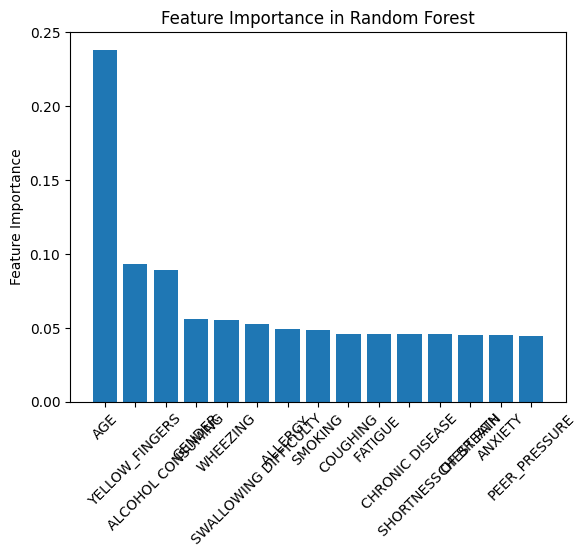

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

feature_names = df_age.columns.drop(["LUNG_CANCER"])
X = df_age[feature_names].values
y = df_age["LUNG_CANCER"].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 888)

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 888, max_features = "sqrt", criterion = "entropy")
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)
best_accuracy = accuracy_score(y_val, y_pred)
best_precision_score = precision_score(y_val, y_pred)
best_recall_score = recall_score(y_val, y_pred)
best_f1_score = f1_score(y_val, y_pred)
best_trees = 100
for i in range(101, 201):
    number_of_better = 0
    random_forest = RandomForestClassifier(n_estimators = i, random_state = 888, max_features = "sqrt", criterion = "entropy")
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precisionscore = precision_score(y_val, y_pred)
    recallscore = recall_score(y_val, y_pred)
    f1score = f1_score(y_val, y_pred)
    if accuracy > best_accuracy:
        number_of_better += 1
    if precisionscore > best_precision_score:
        number_of_better += 1
    if recallscore > best_recall_score:
        number_of_better += 1
    if f1score > best_f1_score:
        number_of_better += 1
    if number_of_better > 2:
        best_accuracy = accuracy
        best_precision_score = precisionscore
        best_recall_score = recallscore
        best_f1_score = f1score
        best_trees = i
print(f"Optimal Number of Trees: {best_trees}")
print(f"Corresponding Accuracy Score: {best_accuracy}")
print(f"Corresponding Precision Score: {best_precision_score}")
print(f"Corresponding Recall Score: {best_recall_score}")
print(f"Corresponding F1 Score: {best_f1_score}")

random_forest = RandomForestClassifier(n_estimators = best_trees, random_state = 888, max_features = "sqrt", criterion = "entropy")
random_forest.fit(X_train, y_train)
feature_importances = random_forest.feature_importances_

# Do a reverse sorted vertical bar plot
indices = np.argsort(feature_importances)[::-1]           # [::-1] reverses the order
plt.bar(np.array(feature_names)[indices], feature_importances[indices])
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45)                                   # otherwist xticks is overcrowded with text
plt.show()


In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_text

decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 888)
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = "entropy", random_state = 888, ccp_alpha = ccp_alpha)
    trees.append(clf)

kf = KFold(n_splits = 10, shuffle = True, random_state = 888)
mean_cv_errors = []

for clf in trees:
    # Perform cross-validation and get the average error for each alpha
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')
    mean_cv_errors.append(np.mean(cv_scores))  # Get average accuracy for each alpha

optimal_alpha_index = np.argmax(mean_cv_errors)
optimal_alpha = ccp_alphas[optimal_alpha_index]
print(f"Optimal alpha: {optimal_alpha}")

pruned_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 888, ccp_alpha = optimal_alpha)
pruned_tree.fit(X_train, y_train)

# Step 7: Evaluate the pruned tree on the validation set
y_pred_pruned = pruned_tree.predict(X_val)
print(f"Accuracy with pruning: {accuracy_score(y_val, y_pred_pruned):.2f}")
print(f"Precision with pruning: {precision_score(y_val, y_pred_pruned):.2f}")
print(f"Recall with pruning: {recall_score(y_val, y_pred_pruned):.2f}")
print(f"F1-Score with pruning: {f1_score(y_val, y_pred_pruned):.2f}")

Optimal alpha: 0.000805279635025675
Accuracy with pruning: 0.87
Precision with pruning: 0.87
Recall with pruning: 0.99
F1-Score with pruning: 0.93
